## Imports

In [140]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [141]:
df = pd.read_csv('../dat/online_shoppers_intention.csv.gz')

In [142]:
print('Dataset has {} rows and {} columns'.format(len(df), df.shape[1]))

print(10*'-')
print('type of the columns:')
df.dtypes

print(10*'-')
print('Total # of NaNs in the dataset: ') 
df.isna().sum().sum()

print(10*'-')
print('data stats')
df.describe().T

Dataset has 12330 rows and 18 columns
----------
type of the columns:


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

----------
Total # of NaNs in the dataset: 


0

----------
data stats


,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [143]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [144]:
df['Revenue'] = df['Revenue'].astype('int') #convert the target to int

# Convert month names to month number
month_str2num = {
    s: i+1 for i, s in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])
}
df['Month'] = df['Month'].replace(month_str2num)

In [145]:
df['Month'].unique()

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12])

In [146]:
cat_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend']
numeric_features = [i for i in df.columns if (i not in cat_features) & (i!='Revenue') ]
numeric_cols = numeric_features+['Revenue']
len(numeric_features), len(cat_features), len(df.columns)

(11, 6, 18)

## Split the data into train and test

Build a predictive classification model using data entries corresponding to the months of June—December as training set, and those corresponding to February—March as test set.

**Comment**

Based on the instructions we split the data into test and train. But before that, we check to see what months we have in the whole dataset. It turns out that *Jan* and *Apr* are missing.

Also, since we are not using *May*, we are not using the the whole dataset (why?)

In [147]:
df_train = df[df['Month']>=6]
df_test = df[df['Month'].isin([2,3])]
df_train.shape, df_test.shape

((6875, 18), (2091, 18))

# Task 1. Classification 

In [148]:
# check the distribution of target in train 
df_train['Revenue'].value_counts()/len(df_train)

0    0.803927
1    0.196073
Name: Revenue, dtype: float64

In [149]:
df_train['SpecialDay'].value_counts()/len(df)
#df_test['SpecialDay'].value_counts()/len(df)

0.0    0.557583
Name: SpecialDay, dtype: float64

The training data only has values for events that took place on a `SpecialDay`. Since we are doing the EDA on the train set and the assumption is that we don't have any knowledge of the test set, we can remove this feature because it has a single value and thus, not informative. However, if the problem statement was to split the train/test otherwise, we might have had to keep this feature. 

Let's take a look at the categorical variables. Note that weekend is boolean but unlike `Revenue` we did not convert it to numeric cuz it does not have a positive or negative connotation. 

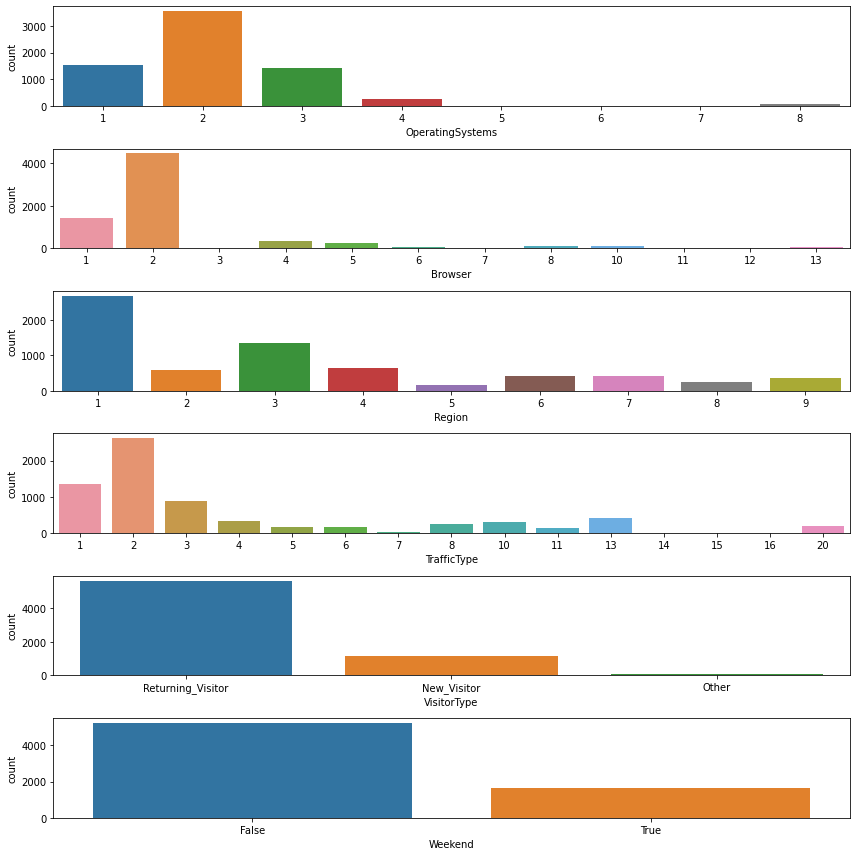

In [150]:
plt.figure(figsize=(12,12))

for i in range(len(cat_features)):
    plt.subplot(6,1,i+1)
    sns.countplot(df_train[cat_features[i]])
plt.tight_layout();

- Most visitors are returning visitors.
- Most purchases are done on weekdays.
- Region 1,3 are dominant.
- Traffic Type 1,2 are dominant.
- Browser 2,1 are dominant.
- Operating system 2,1,3 are dominant. 

In [151]:
X_train = df_train.copy()
y_train = X_train.pop('Revenue')
X_test = df_test.copy()
y_test = X_test.pop('Revenue')


In [152]:
def preprocess(X_train,X_test):
    ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)
    X_train_cat = ohe.fit_transform(X_train[cat_features])
    X_test_cat = ohe.transform(X_test[cat_features])
    new_cat_features = list(ohe.get_feature_names_out(cat_features))
    
    scaler = MinMaxScaler()
    X_train_num = scaler.fit_transform(X_train[numeric_features])
    X_test_num = scaler.transform(X_test[numeric_features])
    
    X_train_transformed = np.hstack([X_train_num, X_train_cat])
    X_test_transformed = np.hstack([X_test_num, X_test_cat])
    
    return X_train_transformed, X_test_transformed, new_cat_features

X_train, X_test, new_cat_features = preprocess(X_train, X_test)

In [153]:
X_train.shape, X_test.shape
X_train_df = pd.DataFrame(X_train, columns=numeric_features+new_cat_features)
X_test_df = pd.DataFrame(X_test, columns=numeric_features+new_cat_features)


((6875, 60), (2091, 60))

### Feature Correlation

In [154]:
X_train_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0.000000,0.000000,0.0,0.0,0.001458,0.003245,0.0,0.039683,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.111111,0.011828,0.0,0.0,0.016035,0.003144,0.0,0.100000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.037037,0.018654,0.0,0.0,0.004373,0.001882,0.0,0.000000,0.116908,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.222222,0.181851,0.0,0.0,0.072886,0.020979,0.0,0.021930,0.077587,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000000,0.000000,0.0,0.0,0.002915,0.000109,0.0,0.500000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [155]:
train_df_new = pd.concat([X_train_df,y_train.reset_index(drop=True)],axis=1)
#df_test_new = pd.concat([X_test_df,y_test.reset_index(drop=True)],axis=1)

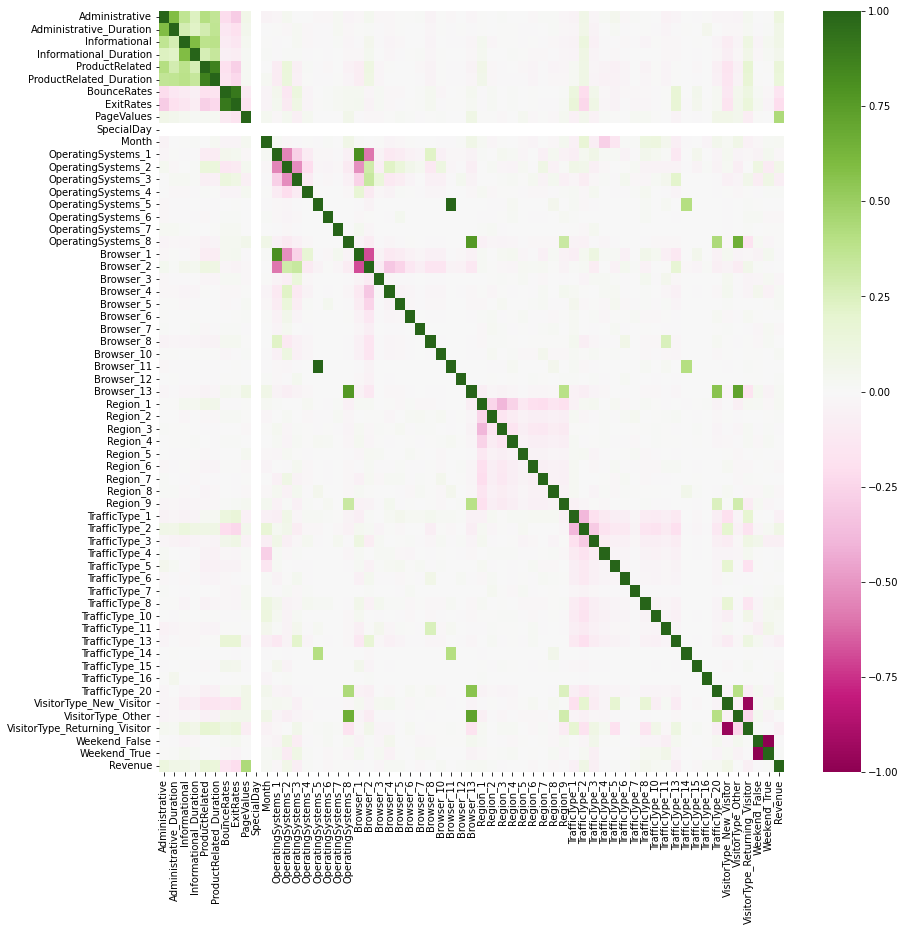

In [156]:
plt.figure(figsize=(14, 14))
cor = train_df_new.corr()
sns.heatmap(cor, vmin=-1, vmax=1, cmap="PiYG");

In [157]:
page_type_features = ['Administrative', 'Administrative_Duration', 'Informational',
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']
ga_features = ['BounceRates', 'ExitRates', 'PageValues']


We observe that 
- pairs in `page_type_features` are highly correlated. This is expected based on the definition of these features in the assignment. 
- `BounceRates` and `ExitRates` are also highly correlated. 
- `PageValues` and `Revenue` also have high correlation. 

Now it's time to remove one of each pairs of highly correlated features. 

In [161]:
keep_columns = np.full(cor.shape[0], True)
for i in range(cor.shape[0] - 1):
    for j in range(i + 1, cor.shape[0] - 1):
        if (np.abs(cor.iloc[i, j]) >= 0.8):
            #print(i,j,cor.columns[i], cor.columns[j])
            keep_columns[j] = False
selected_columns = train_df_new.columns[keep_columns]
train_df_reduced = train_df_new[selected_columns]            
selected_features =  list(selected_columns[:-1])
selected_features.remove('SpecialDay')

X_train_df = X_train_df[selected_features]
X_test_df = X_test_df[selected_features]
assert X_train_df.shape[1], X_test_df.shape[1]

In [162]:
set(train_df_new.columns)-set(X_train_df.columns)
#train_df_new.shape, X_train_df.shape

{'Browser_1',
 'Browser_11',
 'ExitRates',
 'ProductRelated_Duration',
 'Revenue',
 'SpecialDay',
 'VisitorType_Returning_Visitor',
 'Weekend_True'}

2 features were eliminated based on correlation: `ExitRates`, `ProductRelated_Duration`, `Broswer_1`, `Broswer_11`, `VisitorType_Returning_Visitor`, `Weekend_True`

In [163]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10, whiten=True,random_state=42)
X_train_reduced = pca.fit_transform(X_train_df)
X_test_reduced = pca.transform(X_test_df)

## Logistic Regression

We train once with using PCA:

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


def train(X_train,X_test,y_train,y_test, model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

lr = LogisticRegression(class_weight='balanced')

train(X_train_reduced,X_test_reduced,y_train,y_test,lr)


              precision    recall  f1-score   support

           0       0.94      0.71      0.81      1896
           1       0.17      0.59      0.27       195

    accuracy                           0.70      2091
   macro avg       0.56      0.65      0.54      2091
weighted avg       0.87      0.70      0.76      2091



And once without PCA: 

In [165]:
train(X_train_df,X_test_df,y_train,y_test, lr)


              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1896
           1       0.38      0.92      0.54       195

    accuracy                           0.85      2091
   macro avg       0.69      0.88      0.73      2091
weighted avg       0.93      0.85      0.88      2091



Result is much better without using PCA.

## RandomForest

In [166]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=5, class_weight='balanced', random_state=42)
train(X_train_reduced,X_test_reduced,y_train,y_test,rf_model)


              precision    recall  f1-score   support

           0       0.94      0.72      0.81      1896
           1       0.17      0.57      0.27       195

    accuracy                           0.70      2091
   macro avg       0.56      0.65      0.54      2091
weighted avg       0.87      0.70      0.76      2091



In [167]:
train(X_train_df,X_test_df,y_train,y_test,rf_model)


              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1896
           1       0.65      1.00      0.79       195

    accuracy                           0.95      2091
   macro avg       0.82      0.97      0.88      2091
weighted avg       0.97      0.95      0.95      2091



#### Metrics

The accuracy is good; 95% of predictions were correctly identified by the model. But Accuracy is not enough because our dataset is imbalanced. 

The model is giving a recall of 1, which means that 100% of actual positives were correctly classified by the model. (0 False Negative). In other words, 100% of visits that resulted in revenue were correctly classified by the model.

The precision of 0.65 is low though, which means only 65% of positive identification were correct. In other words, 65% of the visits that the model predicted would result in revenue, actually resulted in revenue. 

F1-score is the harmonic mean of precision and recall and it is at ~79%. 


# Task 2. Customer Segmentation


Based on EDA we will remove highly correlated features but we will keep *SpecialDay* since when seen on the whole data, it includes multiple values. 

In [196]:
def preprocess(X):
    ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)
    X_cat = ohe.fit_transform(X[cat_features])
    new_cat_features = list(ohe.get_feature_names_out(cat_features))
    
    scaler = MinMaxScaler()
    X_num = scaler.fit_transform(X[numeric_features])
    
    X_transformed = np.hstack([X_num, X_cat])
    
    return X_transformed, new_cat_features

In [203]:
X = df.drop(columns='Revenue')
y = df['Revenue']

X_transformed, new_cat_features = preprocess(X)
X_transformed_df = pd.DataFrame(X_transformed, columns=numeric_features+new_cat_features)

selected_features += ['SpecialDay']
X_transformed_df = X_transformed_df[selected_features]

In [205]:
pca = PCA(n_components=10, whiten=True,random_state=42)
X_reduced = pca.fit_transform(X_transformed_df)

## Clustering Method 1: Kmeans

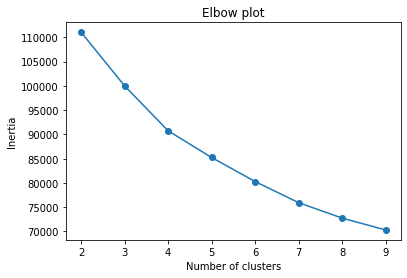

In [208]:
from sklearn.cluster import KMeans
from utils import visualize_elbow
visualize_elbow(X_reduced,range(2,10))

It is not very clear what the elblow is because although 3 looks like one, the inertia still decreases significantly. Let's look at silhouette plots. 

We can choose different features to plot the clusters in 2D. So we will get the index of the features we want and give it as input to the plot function. 

In [209]:
f1 = (list(X_transformed_df)).index('SpecialDay')
f2 = (list(X_transformed_df)).index('PageValues')

For n_clusters = 2 The average silhouette_score is : 0.10596796545677206
For n_clusters = 3 The average silhouette_score is : 0.15628538511093384
For n_clusters = 4 The average silhouette_score is : 0.17710566843989
For n_clusters = 5 The average silhouette_score is : 0.17680523151585967
For n_clusters = 6 The average silhouette_score is : 0.1688417698747125
For n_clusters = 7 The average silhouette_score is : 0.15765391087689715
For n_clusters = 8 The average silhouette_score is : 0.14115897584255024


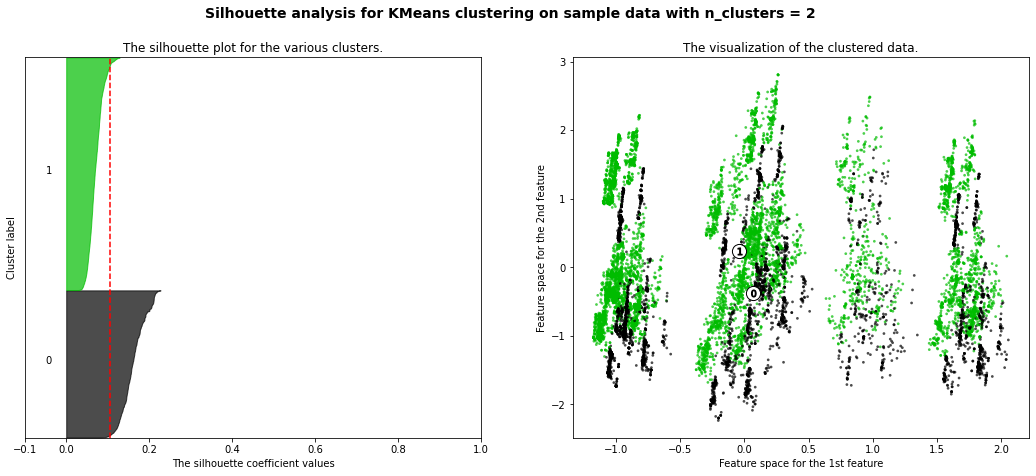

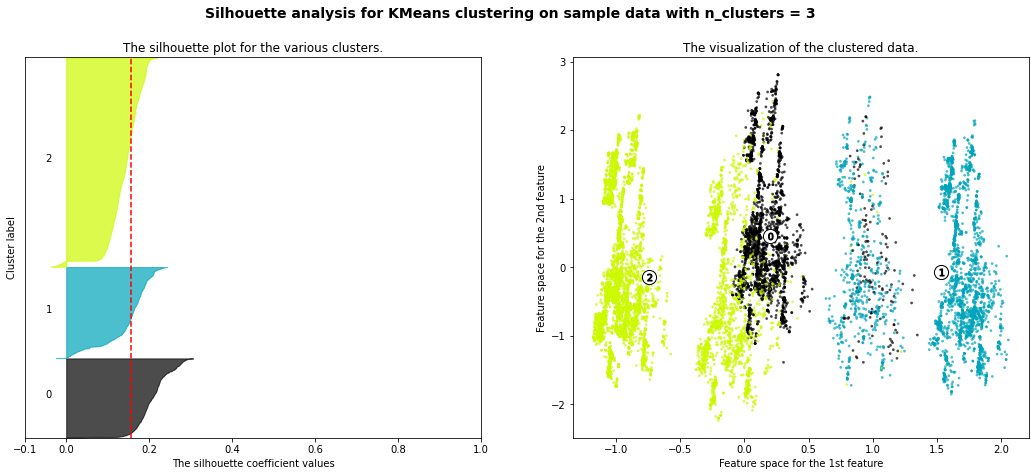

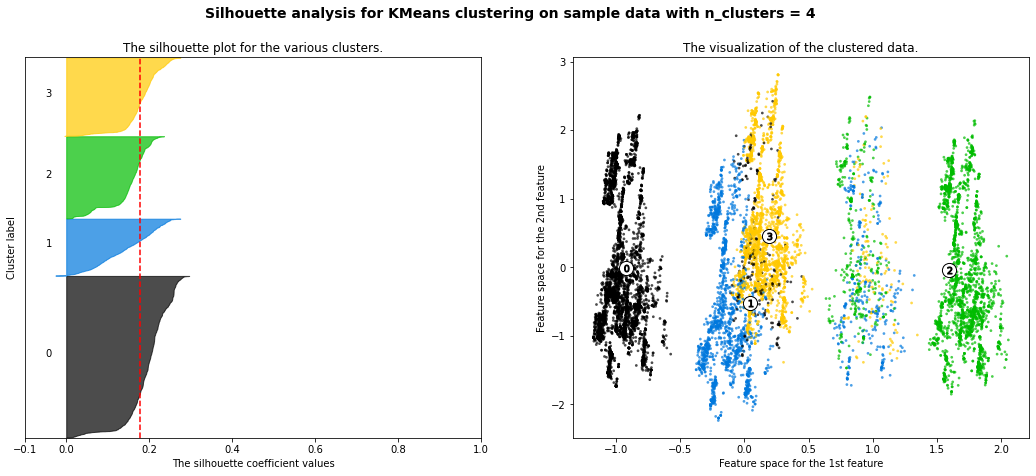

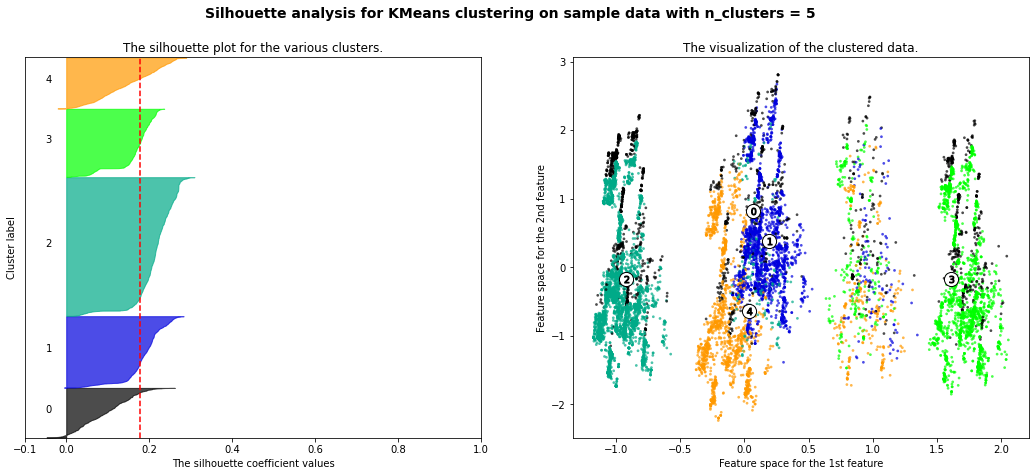

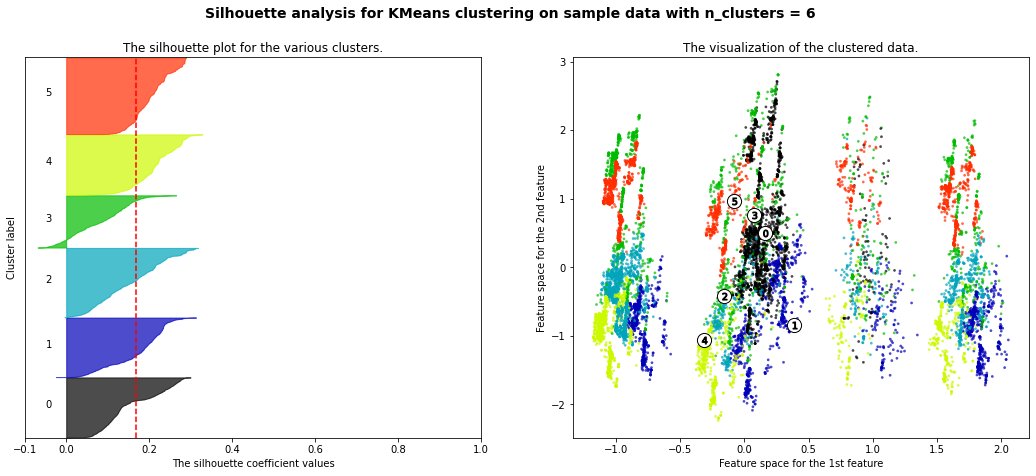

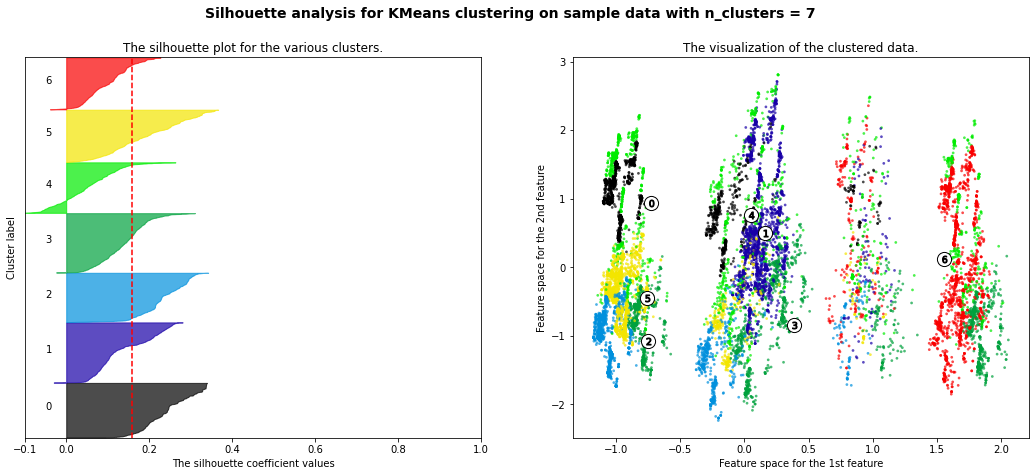

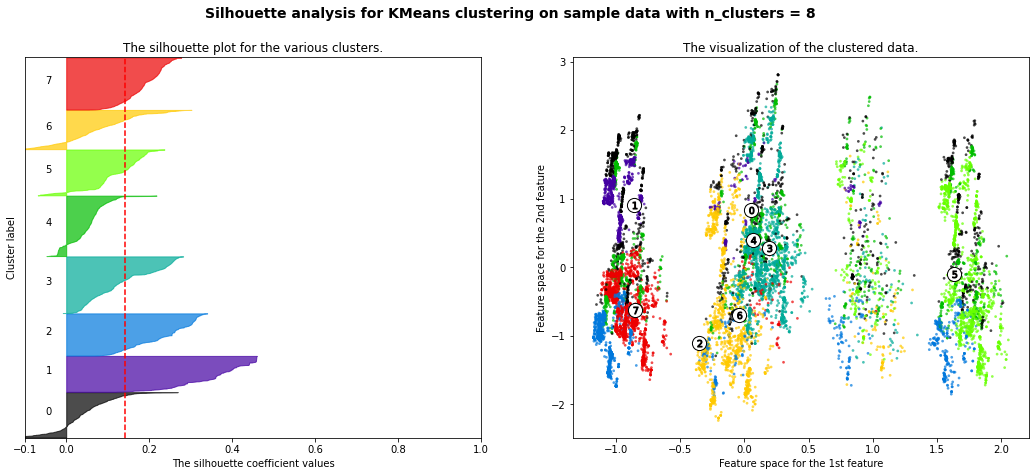

In [247]:
from utils import visualize_silhouette
visualize_silhouette(max_clusters=8, X=X_reduced,f1=0,f2=3)


- `n_cluster=4` has the highest score and all clusters have positive values. 
- `n_cluster=3` however has distinguished clsuters. Let's try with 3

Let's try with 5 clusters

In [350]:
km = KMeans(n_clusters=5, random_state=10)
km.fit(X_reduced)
df['km_cluster'] = km.predict(X_reduced)

clusters_size = pd.DataFrame(km.labels_, columns=['cluster']).\
    value_counts().reset_index().rename(columns={0:'size'})
clusters_size

clusters_size['%']=  clusters_size['size']/clusters_size['size'].sum()
clusters_size.sort_values(by=['cluster'], inplace=True)
clusters_size.reset_index(drop=True,inplace=True)


print(clusters_size)
print('\n% of visits resulting in Revenue by cluster: ')
df.groupby('km_cluster')['Revenue'].sum()
clusters_size['Revenue']=df.groupby('km_cluster')['Revenue'].sum()
clusters_size['Revenue%'] = clusters_size['Revenue']/clusters_size['size']
clusters_size

KMeans(n_clusters=5, random_state=10)

,cluster,size
0,2,4516
1,1,2325
2,3,2217
3,4,1656
4,0,1616


   cluster  size         %
0        0  1616  0.131062
1        1  2325  0.188564
2        2  4516  0.366261
3        3  2217  0.179805
4        4  1656  0.134307

% of visits resulting in Revenue by cluster: 


km_cluster
0    409
1    237
2    731
3    279
4    252
Name: Revenue, dtype: int64

,cluster,size,%,Revenue,Revenue%
0,0,1616,0.131062,409,0.253094
1,1,2325,0.188564,237,0.101935
2,2,4516,0.366261,731,0.161869
3,3,2217,0.179805,279,0.125846
4,4,1656,0.134307,252,0.152174


Let's try with 3 clusters

In [352]:
km = KMeans(n_clusters=3, random_state=10)
km.fit(X_reduced)
df['km_cluster'] = km.predict(X_reduced)

clusters_size = pd.DataFrame(km.labels_, columns=['cluster']).\
    value_counts().reset_index().rename(columns={0:'size'})
clusters_size

clusters_size['%']=  clusters_size['size']/clusters_size['size'].sum()
clusters_size.sort_values(by=['cluster'], inplace=True)
clusters_size.reset_index(drop=True,inplace=True)


print(clusters_size)
print('\n% of visits resulting in Revenue by cluster: ')
df.groupby('km_cluster')['Revenue'].sum()
clusters_size['Revenue']=df.groupby('km_cluster')['Revenue'].sum()
clusters_size['Revenue%'] = clusters_size['Revenue']/clusters_size['size']
clusters_size

KMeans(n_clusters=3, random_state=10)

,cluster,size
0,2,6798
1,1,2960
2,0,2572


   cluster  size         %
0        0  2572  0.208597
1        1  2960  0.240065
2        2  6798  0.551338

% of visits resulting in Revenue by cluster: 


km_cluster
0     269
1     448
2    1191
Name: Revenue, dtype: int64

,cluster,size,%,Revenue,Revenue%
0,0,2572,0.208597,269,0.104588
1,1,2960,0.240065,448,0.151351
2,2,6798,0.551338,1191,0.175199


- 3 clusters
    - Cluster 0 is the least valuable cluster because only 10% of its visits result in Revenue.
    - Cluster 2 is the most valuable segment of clusters because has the highest % of visits that resulted in revenue (17%)


- 5 clusters
    - Cluster 0 is the most valuable segment of clusters because has the highest % of visits that resulted in revenue (25%)
    - Cluster 1 is the least valuable cluster because  only 10% result in Revenue.


Let's go with 3 clusters because in 5 clusters, cluster 2,4 are similar in terms of revenue as well as clusters 1,3. 

In [353]:
grouped_revenue = df[df['Revenue']==1].groupby('km_cluster')

grouped_revenue.agg(
    SpecialDay_avg=('SpecialDay', 'mean'), 
    PageValues_avg=('PageValues', 'mean'), 
    unique_VisitorType=('VisitorType', 'unique'),
    Admin_page_avg= ('Administrative', 'mean'),
    Info_page_avg= ('Informational', 'mean'),
    Prod_page_avg= ('ProductRelated', 'mean'),
    BounceRate_avg= ('BounceRates', 'mean'),
    OperatingSystems_unique= ('OperatingSystems', 'unique')
    )


,SpecialDay_avg,PageValues_avg,unique_VisitorType,Admin_page_avg,Info_page_avg,Prod_page_avg,BounceRate_avg,OperatingSystems_unique
km_cluster,,,,,,,,
0,0.029740,18.607377,"[Returning_Visitor, New_Visitor]",4.052045,0.973978,43.721190,0.011822,"[3, 4]"
1,0.017411,28.628251,"[Returning_Visitor, New_Visitor, Other]",3.180804,0.747768,39.680804,0.005166,"[1, 4, 7, 5, 8]"
2,0.023846,28.706851,"[Returning_Visitor, New_Visitor, Other]",3.324937,0.758186,52.432410,0.003584,"[2, 4, 6, 8]"


A few observations from above for visits that resulted in revenue:
- Cluster 2 has
    - the lowest avg bounce rate.
    - the highest avg product page counts

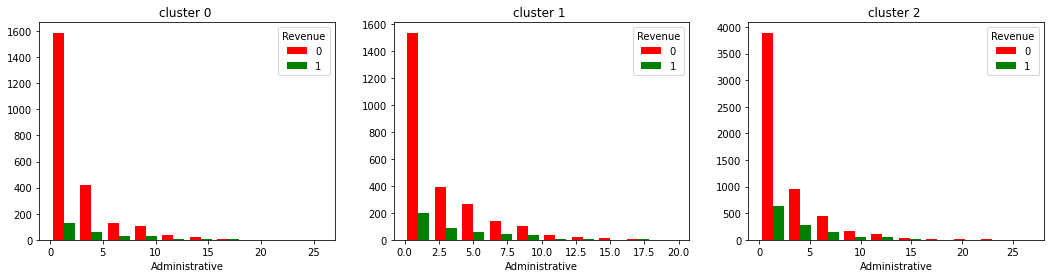

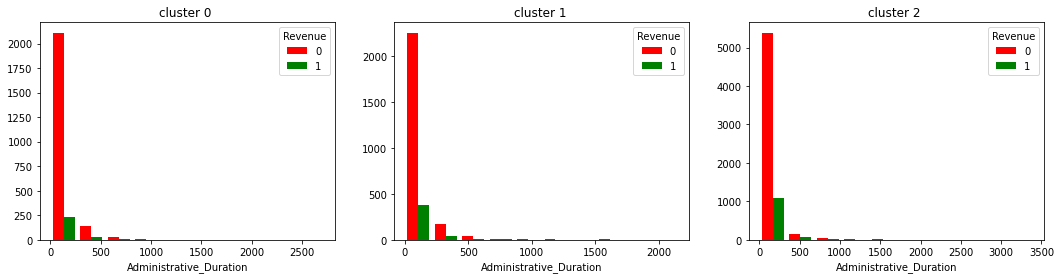

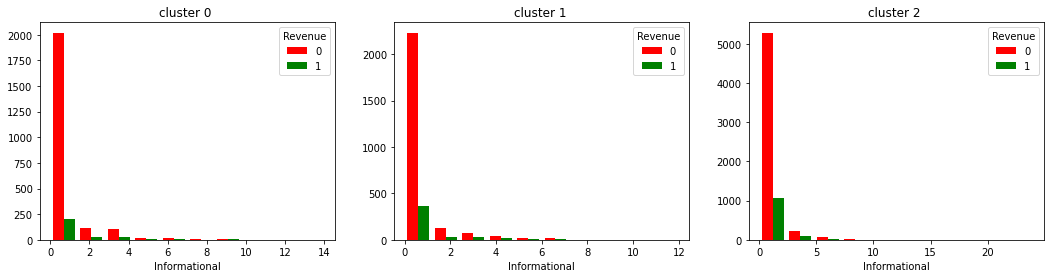

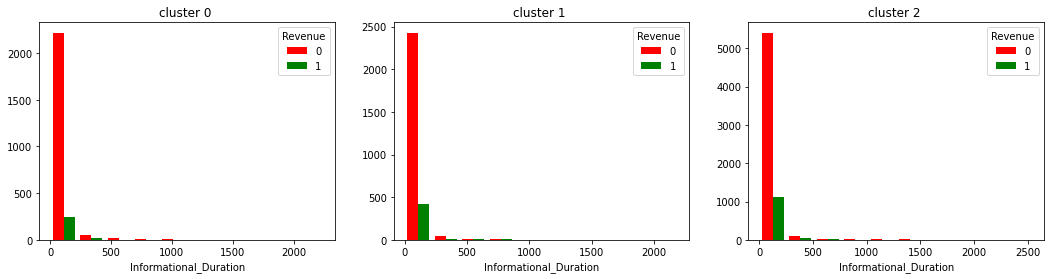

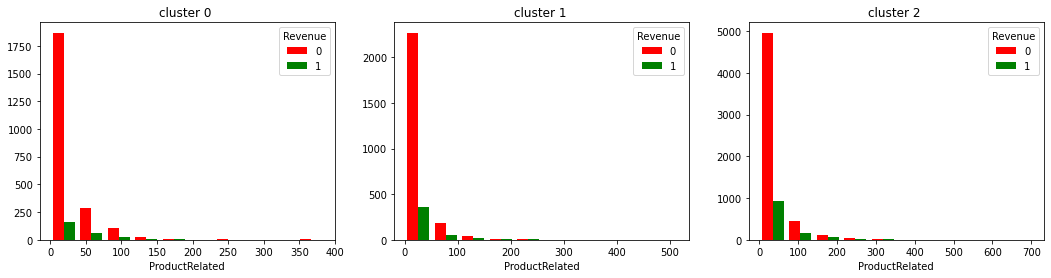

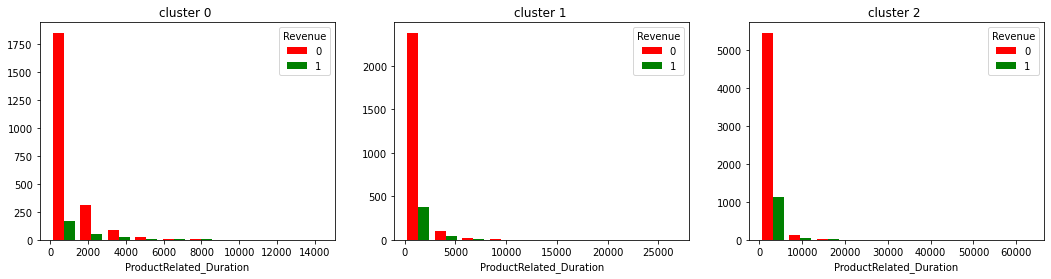

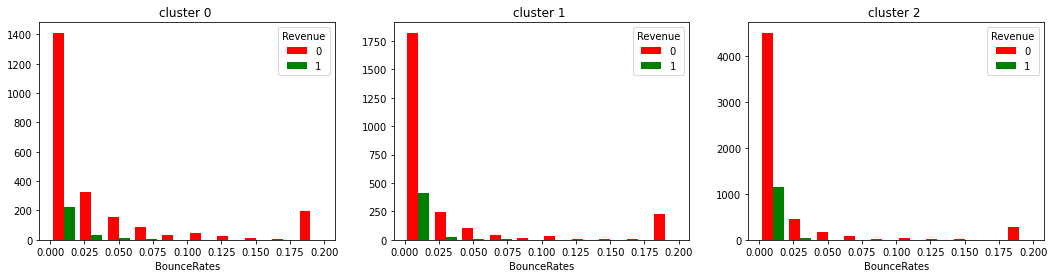

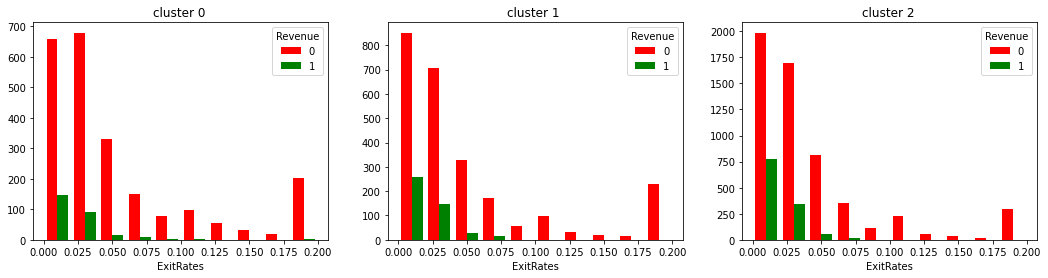

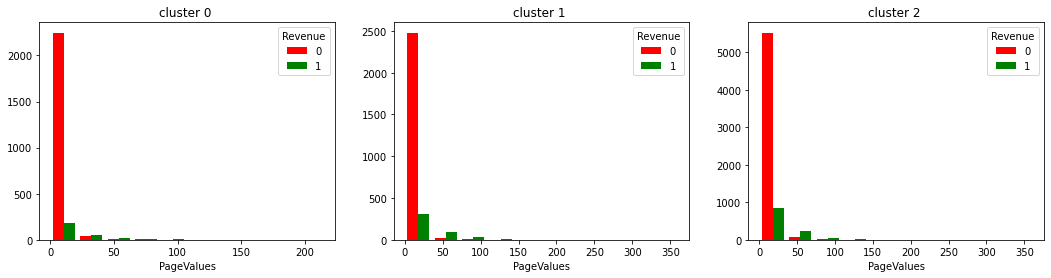

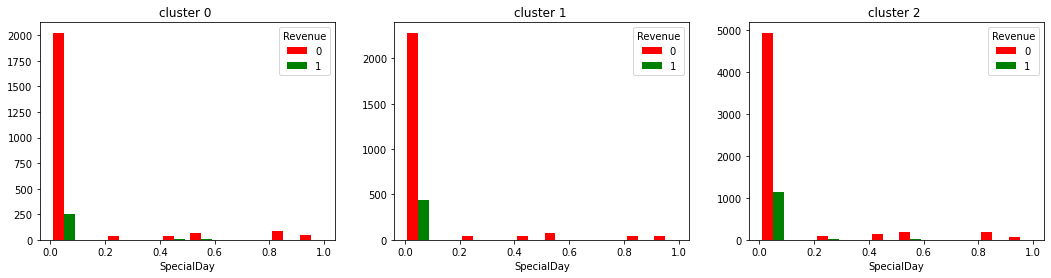

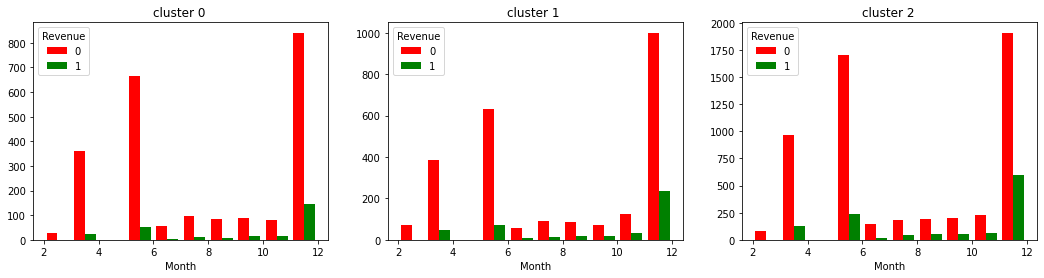

In [271]:
def plot_hist(col, split=True):
    # if split is True, histogram will be plot by purchase
    grouped =  df.groupby('km_cluster')
    fig, axs = plt.subplots(1, 3)
    fig.set_size_inches(18, 4)
    for cluster, group in grouped:
        if split:
            pivot = group.pivot(columns='Revenue', values=col)
            axs[cluster].hist(pivot,color = ['r','g'])
            axs[cluster].legend(pivot.columns, title=pivot.columns.name)
        else:
            axs[cluster].hist(group[col])
        axs[cluster].set_title('cluster {} '.format(cluster))
        axs[cluster].set_xlabel(col)
    plt.show()

for col in X[numeric_features].columns:   
    #print(col)
    plot_hist(col)

From the above charts, we can see that
- cluster 2 only visits very close to the special day

## Clustering method 2: KPrototypes
`KPrototypes` is a clustering method from `kmodes` package that is designed to deal with mixed data types. K-means clusters data based on euclidean distance and K-modes clusters categorical data based on the number of matching categories between data points. KPrototypes is an extension of K-modes that handles both data types. 

In [287]:
selected_num_features = numeric_features.copy()
selected_num_features =[i for i in selected_num_features if i not in ['ExitRates','ProductRelated_Duration']]

In [300]:
X_num_scaled = MinMaxScaler().fit_transform(X[selected_num_features])
X_scaled = np.hstack([X_num_scaled,X[cat_features]])
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_num_features+cat_features)
cat_features_index = [list(X_scaled_df.columns).index(i) for i in cat_features]

X_scaled_df.shape

(12330, 15)

In [358]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=4, init='Cao')
kproto_clusters = kproto.fit_predict(X_scaled_df, categorical=cat_features_index)
df['kproto_cluster'] = kproto_clusters

In [359]:
clusters_size_kproto = pd.DataFrame(kproto_clusters, columns=['cluster']).value_counts().reset_index().rename(columns={0:'size'})
clusters_size_kproto['%']=  clusters_size_kproto['size']/clusters_size_kproto['size'].sum()
clusters_size_kproto.sort_values(by=['cluster'], inplace=True)
clusters_size_kproto.reset_index(drop=True,inplace=True)
#print(clusters_size_kproto)
print('\n% of visits resulting in Revenue by cluster: ')
df.groupby('kproto_cluster')['Revenue'].sum()
clusters_size_kproto['Revenue']=df.groupby('kproto_cluster')['Revenue'].sum()
clusters_size_kproto['Revenue%'] = clusters_size_kproto['Revenue']/clusters_size_kproto['size']

clusters_size_kproto



% of visits resulting in Revenue by cluster: 


kproto_cluster
0    1250
1       3
2      58
3     597
Name: Revenue, dtype: int64

,cluster,size,%,Revenue,Revenue%
0,0,5851,0.474534,1250,0.213639
1,1,787,0.063828,3,0.003812
2,2,967,0.078427,58,0.059979
3,3,4725,0.383212,597,0.126349


In [357]:
kproto = KPrototypes(n_clusters=3, init='Cao')
kproto_clusters = kproto.fit_predict(X_scaled_df, categorical=cat_features_index)
df['kproto_cluster'] = kproto_clusters

clusters_size_kproto = pd.DataFrame(kproto_clusters, columns=['cluster']).value_counts().reset_index().rename(columns={0:'size'})
clusters_size_kproto['%']=  clusters_size_kproto['size']/clusters_size_kproto['size'].sum()
clusters_size_kproto.sort_values(by=['cluster'], inplace=True)
clusters_size_kproto.reset_index(drop=True,inplace=True)
#print(clusters_size_kproto)
print('\n% of visits resulting in Revenue by cluster: ')
df.groupby('kproto_cluster')['Revenue'].sum()
clusters_size_kproto['Revenue']=df.groupby('kproto_cluster')['Revenue'].sum()
clusters_size_kproto['Revenue%'] = clusters_size_kproto['Revenue']/clusters_size_kproto['size']

clusters_size_kproto



% of visits resulting in Revenue by cluster: 


kproto_cluster
0    1250
1       3
2     655
Name: Revenue, dtype: int64

,cluster,size,%,Revenue,Revenue%
0,0,5851,0.474534,1250,0.213639
1,1,832,0.067478,3,0.003606
2,2,5647,0.457989,655,0.115991


- 4 clusters:
    - cluster 2 has 38% of the total visits and has the highest % (21%) that resulted in revenue. 
    - cluster 1 is the least valuable segement with only 0.3 % resulting in revenue. 


- 3 clusters:
    - cluster 0 has 47% of the total visits and has the highest % that resulted in revenue (21%). 
    - cluster 1 is the least valuable segement with only 0.3 % resulting in revenue. 
    
    
3 clusters looks like a better choice.    

<Figure size 1152x576 with 0 Axes>

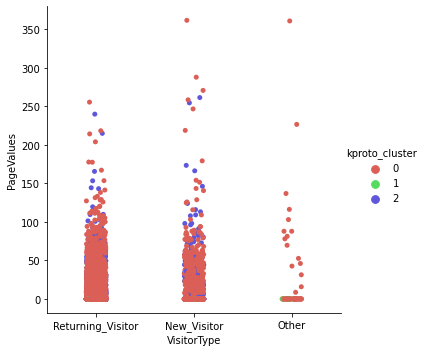

In [308]:
plt.figure(figsize=(16,8))
sns.catplot(x='VisitorType', y='PageValues', hue="kproto_cluster", 
            data=df,palette=sns.color_palette("hls",3),
            legend='full')
plt.show();

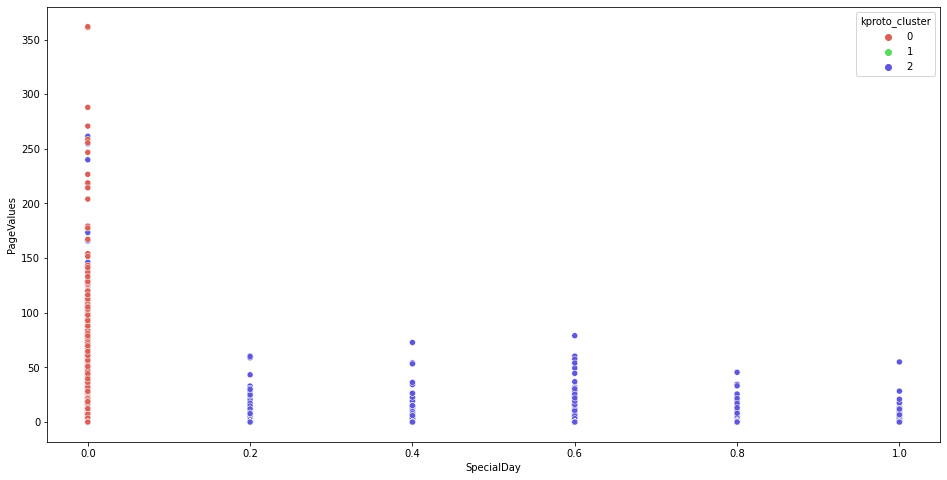

In [309]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='SpecialDay',y='PageValues',hue='kproto_cluster',
                data=df, palette=sns.color_palette("hls",3),
                legend="full")
plt.show();

- cluster 0 is the cluster that has the lowest value for *SpecialDay*, meaning that they visit only on special days and they also visit high value pages which can translate to brand-conscious customers. 
- New and returning visitors are not distinguished by clusters. 

# Task 3. Semi-Supervised Learning


Consider you have training data with the Revenue attribute for records from June—September only. For all records from October—December, however, Revenue attribute is missing. Build a semi-supervised self-labeling model to estimate Revenue for the missing records in October—December and then fit your classifier. Report classification performance on February—March data set with and without the self-labeled data.

- If you do not consider the records from October—December, generate the classification performance on test data
- After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.


In [363]:
X_train_labeled = df[df['Month'].isin([6,7,8,9])]
X_train_unlabeled = df[df['Month'].isin([10,11,12])]

y_train_labeled = X_train_labeled.pop('Revenue')
y_train_unlabeled = X_train_unlabeled.pop('Revenue')

X_train = pd.concat([X_train_labeled, X_train_unlabeled])
y_train = np.concatenate((y_train_labeled, y_train_unlabeled))

X_test = df[df['Month'].isin([2,3])]
y_test = X_test.pop('Revenue')

In [364]:
y_train.shape, np.unique(y_train), np.unique(y_train_unlabeled), y_train_unlabeled.shape

((6875,), array([0, 1]), array([0, 1]), (5274,))

In [365]:
assert X_test.shape[0]== y_test.shape[0]
assert X_train.shape[0]== y_train.shape[0]
print('unlabeled data samples: {}; labeled data samples {}'.format(len(X_train_unlabeled),len(X_train_labeled)))


unlabeled data samples: 5274; labeled data samples 1601


In [367]:
cat_features

['OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

### Classification performance on test set without self-labeled data

In [368]:
# without label spreading
from sklearn.metrics import classification_report

def train_classification(X_train,X_test, y_train, y_test, scale = True) -> None:
    numeric_transformer = MinMaxScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

    if scale:
        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer, cat_features),
                        ]
                                        )    
    else:
        preprocessor = ColumnTransformer(
            transformers=[
                ("cat", categorical_transformer, cat_features),
                        ]
                                        )    
    pipe = Pipeline(
        steps=[("preprocessor", preprocessor), ("model", LogisticRegression(class_weight='balanced'))]
                   )

    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))
    
train_classification(X_train,X_test, y_train, y_test, scale=True)

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      1896
           1       0.32      0.92      0.48       195

    accuracy                           0.81      2091
   macro avg       0.66      0.86      0.68      2091
weighted avg       0.93      0.81      0.85      2091



### Semi-supervised learning

we assign -1 to y_unlabeled for semi-supervised learning.

In [369]:
y_train = np.concatenate((y_train_labeled, np.full(y_train_unlabeled.shape, -1))) 


In [370]:
assert y_train.shape[0]==X_train.shape[0]

In [371]:
from sklearn.semi_supervised import LabelSpreading

def train_label_spread(X,y, scale=True):
    ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)
    X_cat = ohe.fit_transform(X[cat_features])
    new_cat_features = ohe.get_feature_names_out(cat_features)
    
    if scale:
        scaler = MinMaxScaler()
        X_num = scaler.fit_transform(X[numeric_features])
    else:
        X_num = X[numeric_features].to_numpy()
        
    X_transformed = np.hstack([X_num, X_cat])


    label_prop_model = LabelSpreading(kernel='knn', alpha=0.01)
    label_prop_model.fit(X_transformed,y)
    semi_sup_preds = label_prop_model.transduction_[y_train_labeled.shape[0]:]
    return semi_sup_preds


We do the label spreading once with scaling numeric features

In [372]:
semi_sup_preds = train_label_spread(X_train,y_train)    
print(classification_report(y_train_unlabeled, semi_sup_preds)) 

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      4183
           1       0.27      0.09      0.13      1091

    accuracy                           0.76      5274
   macro avg       0.54      0.51      0.50      5274
weighted avg       0.69      0.76      0.71      5274



We do the label spreading once without scaling numeric features

In [373]:
semi_sup_preds = train_label_spread(X_train,y_train, scale=False)    
print(classification_report(y_train_unlabeled, semi_sup_preds)) 

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4183
           1       0.44      0.24      0.31      1091

    accuracy                           0.78      5274
   macro avg       0.63      0.58      0.59      5274
weighted avg       0.74      0.78      0.75      5274



The performance metrics in both cases are not good but without scaling, they are better. 

Now we calculate classification report with self-labeled data and based on the above, it should be worse than the result without self-labeled data. 

In [374]:
y_train = np.concatenate((y_train_labeled, semi_sup_preds)) 
np.unique(y_train)

array([0, 1])

In [375]:
train_classification(X_train,X_test, y_train, y_test, scale=True)

              precision    recall  f1-score   support

           0       0.99      0.32      0.49      1896
           1       0.13      0.97      0.23       195

    accuracy                           0.38      2091
   macro avg       0.56      0.65      0.36      2091
weighted avg       0.91      0.38      0.46      2091

